# YOLO- real time detection method

In [46]:
import cv2
import numpy as np
import pytesseract as pt
import matplotlib.pyplot as plt


In [47]:
# train on yolo3 model

# yolo.cfg- architecture and parameters
classFile = './coco.names'
classNames = []
with open(classFile, 'rt') as f:
    classNames = f.read().splitlines()
print(classNames)    

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [48]:
configPath='/home/webwerks/Desktop/ocr/yolov3.cfg'
weightsPath='/home/webwerks/Desktop/ocr/yolov3.weights'

In [49]:
# create network


net=cv2.dnn.readNetFromDarknet(configPath,weightsPath)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

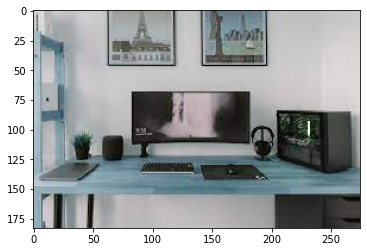

In [50]:
# declare opencv as backend and use cpu

img=cv2.imread('./detection.jpeg')
plt.imshow(img)

In [27]:
# image would be in bgr format convert it in rgb format
# values would be in integer convert it in float
# ensure value ranging 0 and 1
# resize image
# images
# argument= swapRB=True---read in bgr so interchange r and b

# network accepts particular format of image which is blob
# (width, height)=320,320---sizze 320 becuase we r yolo320
# mean we wrote [0,0,0]
blob=cv2.dnn.blobFromImage(img,1/255,(320,320),[0,0,0],1,crop=False)


In [28]:
blob.shape

(1, 3, 320, 320)

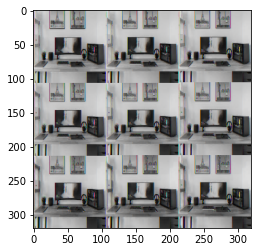

In [29]:
plt.imshow(blob[0].reshape(320,320,3))

In [30]:
# set blob as input image

net.setInput(blob)


In [33]:
# we have three different outputs- in order to find output of these layers 
# we need to know names of these layers 

# layerNames=net.getLayerNames()

# we have to extract only output layers but we get the index of output
# refer it back to layer name and extract names from these indexes

# outputNames=[layerNames[i[0]-1] for i in net.getUnconnectedOutLayersNames()]
outputLayerNames=net.getUnconnectedOutLayersNames()
# yolo_82, yolo_94, yolo_106

# send these image as a forward pass to net and find output of these three layers
layerOutput=net.forward(outputLayerNames)
# print(len(layerOutput))   # 3,3,3,3
# print(type(layerOutput))  # list
# print(layerOutput[0].shape)  # 300,85- matrix
# print(layerOutput[1].shape)  # 1200,85- matrix
# print(layerOutput[1].shape)  # 4800,85- matrix

In [43]:
def findObjects(outputs,img):
    hT, wT, cT = img.shape
    bbox = []
    classIds = []
    confs = []
    
    for output in outputs:
        for det in output:
            scores = det[5:]
            classId = np.argmax(scores)
            confidence = scores[classId]
            if confidence > 0.7:
                w,h = int(det[2]*wT), int(det[3]*hT)
                x,y = int((det[0]*wT) - w/2), int((det[1]*hT) - h/2)
                bbox.append([x,y,w,h])
                classIds.append(classId)
                confs.append(float(confidence))
    #print(len(bbox))
    indices = cv2.dnn.NMSBoxes(bbox, confs, 0.5, 0.4)  # confthreshold, nmsthreshold
    
    for i in indices:
        i = i[0]
        box = bbox[i]
        x,y,w,h = box[0],box[1],box[2],box[3]
        cv2.rectangle(img,(x,y),(x+w, y+h),(255,0,255),2)
        cv2.putText(img,f'{classNames[classIds[i]].upper()} {int(confs[i]*100)}%',
                   (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,0,255),2)

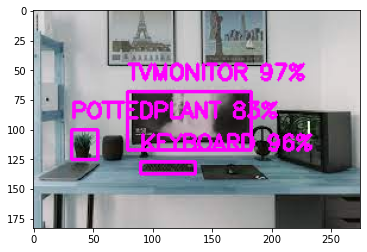

In [44]:
findObjects(layerOutput,img)

plt.imshow(img)

In [35]:
import numpy as np
import cv2
import imutils
from skimage.filters import threshold_local
import matplotlib.pyplot as plt

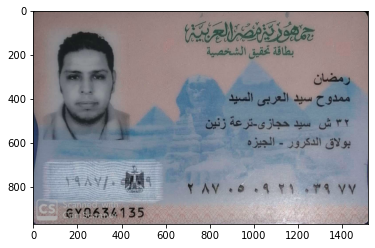

In [43]:
image=cv2.imread('./Images_100/CustNID_19110050031.jpg')
plt.imshow(image)

In [9]:
image.shape[0]

968

In [37]:
ratio=image.shape[0]/500.0

In [38]:
orig=image.copy()

In [39]:
image=imutils.resize(image,height=500)

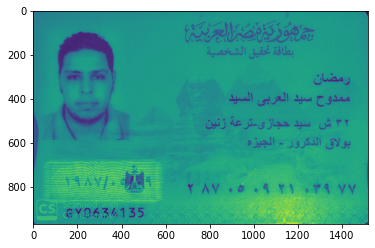

In [44]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

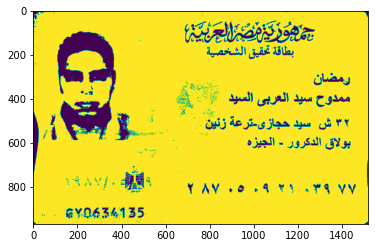

In [45]:
gray = cv2.threshold(gray, 0, 255,
                         cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(gray)

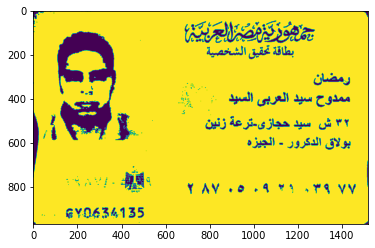

In [46]:
gray=cv2.medianBlur(gray,3)
plt.imshow(gray)

In [47]:
print(pytesseract.image_to_string(gray,lang='ara+en'))

0 | لك 1
بطاقة تحقيق الشخصية
١“ ش سيد حجازى-ترعة زنين
بولاق الدكرور - الجيزه

 

بان وب وعم يولره, بام ؟ ع0



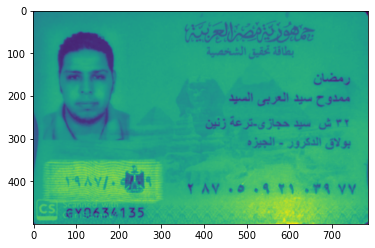

In [15]:
gray=cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(gray)

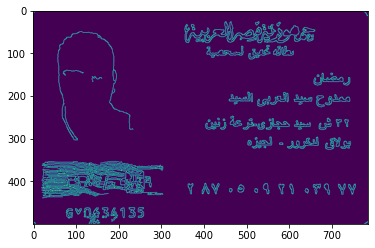

In [24]:
edged=cv2.Canny(gray,0,200)
plt.imshow(edged)

In [30]:
import pytesseract
print(pytesseract.image_to_string(edged,lang='ara+en'))

ك4

طاته تميق لسحصية
رمصبان 3 حت
ل
5ش سيد حجازىترعة زنين
يولاق لمكرور - لجيزه
2 -
كا ا ا كت لذ فا ل
ل 1 فين



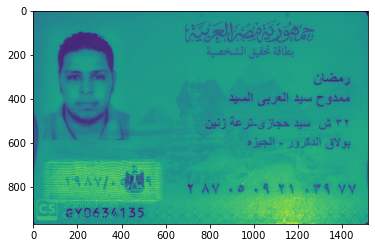

In [73]:
im_gray=cv2.imread('./Images_100/CustNID_19110050031.jpg',cv2.IMREAD_GRAYSCALE)
im_bw=im_gray
plt.imshow(im_bw)

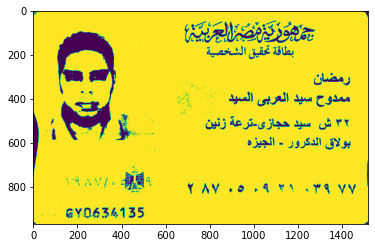

In [74]:
thresh=100
im_bw=cv2.threshold(im_bw,thresh,200,cv2.THRESH_BINARY)[1]
plt.imshow(im_bw)

In [76]:
print(pytesseract.image_to_string(im_bw,lang='ara+en'))

اج توس اا سه
بطاقة م فية الك 5 م
رمضان
ممدوح سيد العربى السيد
؟“" ش سيد حجازى-ترعة زنين
بولاق الدكرور - الجيزه

 

لاا 4ص 55 تل شل بام ؟ أ . رحد ةا
5 010601730



الشخصية



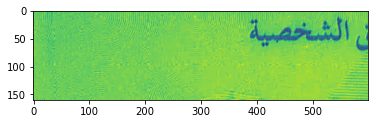

In [62]:
pic=im_gray[150:310,400:1000]
plt.imshow(pic)
print(pytesseract.image_to_string(pic,lang='ara+en'))

درععه رديلن



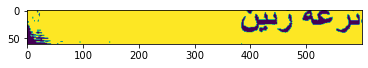

In [61]:
Id=im_bw[500:560,400:1000]
plt.imshow(Id)
print(pytesseract.image_to_string(Id,lang='ara+en'))

In [ ]:
from PIL import Image
from PIL import ImageFilter

area=